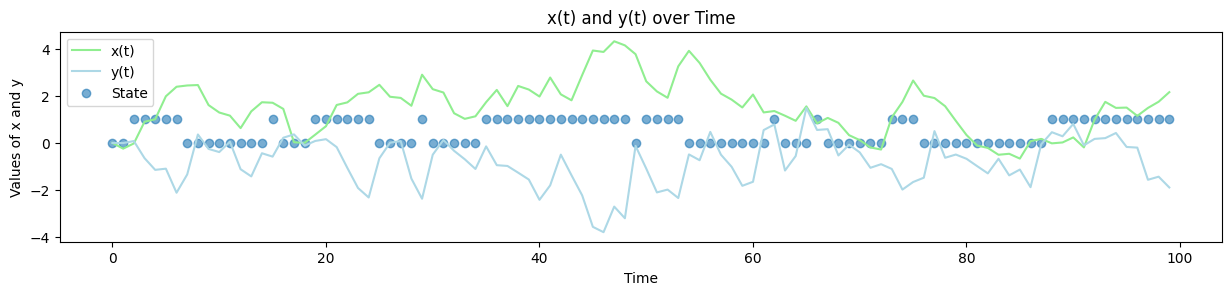

In [30]:
# Revised code to correctly handle the state transitions and use different parameters for each state

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# Set the random seed for reproducibility
# np.random.seed(0)

num_obs = 100

# Generating two sets of parameters for each state
phi = np.random.uniform(-1, 1, size=2)  # Two values of phi in [-1, 1]
mu = np.random.uniform(-1, 1, size=2)  # Two values of mu in [-1, 1]
omega = np.random.uniform(0.01, 1, size=2)  # Two values of omega in [0.01, 1]
alpha = np.random.uniform(0.01, 1, size=2)  # Two values of alpha in [0.01, 1]
beta = np.array(np.absolute([np.random.uniform(0.01, 1 - 0.5*alpha[i]- 0.5*phi[i]) for i in range(2)]))  # Two values of beta
df = np.random.randint(15, 150, size=2)  # Two values for degrees of freedom
nu = np.random.uniform(0, 5, size=2)  # Two values for variance

# Transition probabilities for the Markov Switching
p11 = np.random.uniform(0, 1)  # Transition probability from state 1 to state 1
p22 = np.random.uniform(0, 1)  # Transition probability from state 2 to state 2

# Custom defining variables for testing
# Generating two sets of parameters for each state
mu = [[0,-0.5],[0.5,-0.1]]
phi = [[[0.8,-0.15],[0.25,0.3]],[[0.7,-0.3],[-0.3,0.6]]]

# Transition probabilities for the Markov Switching
p11 = 0.9  # Transition probability from state 1 to state 1
p22 = 0.8  # Transition probability from state 2 to state 2
# Initialize the arrays



# Initialize the arrays for x, y, and states
x = np.zeros(num_obs)
y = np.zeros(num_obs)
z1 = np.zeros(num_obs)
z2 = np.zeros(num_obs)
states = np.zeros(num_obs, dtype=int)

# Generate observations and states for the VAR process
for t in range(1, num_obs):
    # Determine the state transition
    if states[t-1] == 0:
        states[t] = 0 if np.random.rand() < p11 else 1
    else:
        states[t] = 1 if np.random.rand() < p22 else 0
    z1[t] = np.random.normal(0,0.4)
    z2[t] = np.random.normal(0,0.7)
    # Calculate x and y using the state-dependent parameters
    current_state = states[t]
    x[t] = mu[current_state][0] + phi[current_state][0][0] * x[t-1] + phi[current_state][0][1] * y[t-1]---
title: "Expectation Maximization Algorithm Report"
author: "Dominic Scruton"
date: "19 February 2021"
output: html_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
```

# Introduction

## Problem Description

The Expectation-Maximization is a semi-supervised cluster method used to categorize observations based on the characteristics of other observations whose cluster/ group is known. Hence, the method is semi-supervised, since one only knows which cluster an observation belongs to for a subset of observations, with the goal to use information from such obsrvations to inform the cluster for observations whose cluster is unknown.

For example, we can consider a case in the insurance industry

A common modelling problem is how to estimate a joint probability distribution for a dataset. The method of Maximum Likelihhod selects the parameters that maximize the probability of seeing the data. A disadvantage of Maximum Likelihood is that it assumes that all variables that are relevant to the problem of density estimation and clustering are present. However, there may be some datasets where only the relevant variables are observed and others are not, and although they influence other random variables in the dataset, they remain hidden. These are known as _latent_ variables. "Many real-world problems have hidden variables (sometimes called latent variables), which are not observable in the data that are available for learning" (Russell, 2015). 
The Expectation-Maximization Algorithm is "a general technique for findings maximum likelihood estimators in Latent Variable models". It is linked to both Hidden Markov Models. Suppose we have a sequence of choices made that are independent. The processes used to generate each sequence of choices represent a latent variable, e.g. process $k \in K$. In the EM-Algorithm, the Expectation Step estimates probability that each sequence belongs to each of the k process generating steps. The Maximization Step then optimizes the parameters of the distribtuion using maximum likelihood. 

## Latent Variables and Processes

The Expectation-Maximization Algorithm is particularly useful for identifying and modelling latent variables. 

## Mixture Models

The most common use of Expectation-Maximization Algorithms in the literature is for the estimation of density functions and the use of such density functions to cluster observations. 

A _Gaussian Mixture Model_ (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density and orientationm (since the mean and standard deviation parameters for each mixture are themselves vectors). 

Let $X_i$ represent the variables for observation $i$ and let $G_i$ by the cluster $i$ is in. We assume $X_i$ is normally distributed with mean $\textbf{\mu_k}$ and variance $\textbf{\sigma_k^2}$ when $G_i = k$. We also let $\lambda_k$ be the probability that the observation is in group $k$.

The (multivariate) probability density function for $X_i$ is then given by:

$$f(x) = \sum_{k = 1}^K \lambda_k \phi(x|\mu_k, \sigma_k^2)$$

where $\phi(.| \mu_k, \sigma_k^2)$ is a normal probability density function with mean $\mu_k$ and variance $\sigma_k^2$. Not that the above formulation could be applied to any parametrized distribution. The aim is thus to identify the parameters $\lambda_k$, $\mu_k$ and $\sigma_k^2$ for every group, k. These estimates are then used to categorize the remaining observations with no prior cluster assignment. Note that we must specify the number of groups a priori. 

The d-dimensional Multivariate Normal distribution is given as follows:

$$f(\textbf{x}; \boldsymbol{\mu}, \boldsymbol{\sigma}) = \frac{1}{(2 \pi)^{\frac{d}{2}}|\Sigma|^{\frac{1}{2}}} exp(- \frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu}))$$

In order for a vector to be Multivariate Normally distributed, the following must apply:


To check whether a random vector is Multivariate Normally distributed, we can consider the Mahalanobis Distance. One can also transform individual variables to ensure they are approximately multivariate normally distibuted. 

Whilst using a unsupervised Clustering algorithm may also be useful, it is worthwhile using the property of Normality for the data in order to identify such clusters and find a distribution for each cluster.

# Expectation-Maximization Algorithm

The Expectation-Maximization Algorithm consists of distributional assumptions regarding the clustering of the data, with each cluster typically considered to be (multivariate) normal. To solve this problem, we assign values of each explanatory variable to each cluster, estimate the mean and standard deviation for these groups and then iteratively consider whether to change the grouping or not. 

The model depends on some unobserved latent variable.

## Pseudo-Code

The EM-Algorithm consists of assigning an initial grouping, followed by iteration between an expectation and maximization step, with a test for convergence determining when iteration can stop.  
The pseudo-code for the general implementation of the Expectation-Maximization function is as follows:

1) Initialize 
2) Repeat until convergence:
  a) Expectation Step
  b) Maximization Step
  c) Check for Convergence
  
### Initialize

Suppose we have target category $\textbf{y}$, which for a proportion of observations, $p$, is known and for the other $N (1 - p)$ observations is unknown, where $N$ is the total number of observations. Each observation has an associated set of other variables, $\textbf{x}$. For example, $y$ could be the age group of the identified fish and $x$ could be the length of each fish. 

1) Using data from the observations of known category, assign labels (categories) to each of the $N (1 - p)$ observations in the dataset that have unknown $y$.
2) Given these initial assignments, compute initial values of $\hat{\mu_k}$ and $\hat{\sigma}_k$ for each cluster, $k = 1,...K$
3) Compute Initial Values of $\hat{\lambda}_k$

In multiple dimensions, we have the following:

There are several ways one could initialize model parameters. Random assignment is a simple approach that randomly assigns a cluster to each observation with a priori unknown cluster. A problem with this approach is that we expect to assign clusters in equal proportion to the observations with known cluster. However, a better alternative is to assign observations using a standard cluster method, for example K-Means. This method is non-parametric in that it does NOT assume a distribution for fish lengths. We can use pre-existing packages to carry out this step for initialization of model parameters. The default initialization is therefore set to use the K-Means cluster algorithm.

Other initialization methods include fitting supervised classification models for the observations with iknown cluster group and using such models to predict the cluster group for the remaining observations. A variety of models could be used, with a simpler multinomial model perhaps more time-effective for initialization. The bene

We compare the performance of different assignments. This step is arguably the most crucial in ensuring good performance of the EM-Algorithm.


### Expectation Step

The expectation step quantifies the chance an observation belongs to each group. We do this by calculating the probability that $\textbf{x}_i$ belongs to group k using Bayes Rule:

$$P(x_i \in  k | x_i) = \frac{P(x_i | x_i \in k)P(k)}{P(x_i)}$$
This posterior probability that observation $i$ belongs to group $k$ is computed for each observation $x_i$ based on our current best estimate of the mean and variance parameters. $P(x_i | x_i \in k)$ is given by the (Gaussian Multivariate) density function with mean $\mu_k$ and variance $\sigma_k^2$. $P(x_i)$ is the total probability, summed over all groups, found using the Partition Theorem:

$$P(x_i) = \sum_{k = 1}^K P(x_i|x_i \in k) P(k)$$


### Maximization Step

In this step, the best estimates of the mean and variance are updated, given the current grouping. Given the probabilities of membership estimated above, we compute another iteration of the estimate $\hat{\mu}_k$ as:

$$\hat{\mu}_k = \frac{\sum_{i = 1}^N P(x_i \in k | x_i)x_i}{\sum_{i = 1}^{N}P(x_i \in k | x_i)}$$

Note that this is a weighted mean, with the weights corresponding to the probability of an observation belonging to each class for each observation. The new estimate of $\sigma_k$ is based on $\hat{\mu}_k$:

$$\hat{\sigma}_k = \sqrt{\frac{\sum_{i = 1}^N P(x_i \in k | x_i)(x_i - \hat{\mu}_k)^2}{\sum_{i = 1}^N P(x_i \in k |x_i)}}$$

Finally, 

$$\hat{\lambda_k} = \frac{1}{N}\sum_{i = 1}^N P(x_i \in k | x_i)$$

### Convergence Check

There are a number of ways to check whether we have converged to the optimal grouping and parameter estimates. One such method is to compute the _log-likelihood_ at each iteration and determine if it has changed by a large enough amount to imply the algorithm has not converged. Once we have converged, the log-likelihood will have only changed by a small amount.

The likelihood of our data given these new values of $\hat{\lambda}$, $\hat{\mu}$ and $\hat{\sigma}$ is:

$$\ell(\mu, \lambda, \sigma | \textbf{X}) = \prod_{i = 1}^N \sum_{k = 1}^K \lambda_k \phi(x_i|\mu_k, \sigma_k^2)$$

The log-likelihood is the logarithm of this quantity. We must be careful how we choose to compute this- problems with convergence since the log of a negligible number is strongly negative.

Convergence is reached when:

$$ln(\ell^{i + 1}) - ln(\ell^i) < \epsilon$$

where $ln(\ell^i)$ is the log-likelihood from the $i^{th}$ iteration from the EM-Algorithm and $\epsilon$ is a desired tolerance. 

# Example

Consider the following mathematical example to clarify the EM-Algorithm. Suppose we have data on the width and length of 4 fish that belong to 3 age groups, where 1 represents "young" fish, 2 "adult" fish and 3 "old" fish:

| fishID | Width | Length | Age Group |
|--------|-------|--------|-----------|
| 1      |  5 | 20 | 1 |
| 2 | 7 | 30 | 3 |
| 3|4|10|1|
|4|5|17|2|

We assume that each age group has lengths and widths that belong to a Multivariate Gaussian Mixture Model. The length and width of several species of fish are know to increase with age. There will of course be some overlap in the distributions, for example for unusually large 'young' fish and unusually small 'adult' fish. The goal is to classify the age group of the 2 unassigned fish using the attributes of the 4 fish with known age group. Assume the data are multivariate normally distributed.

## 1) Initialization

Firstly the parameters for each 2-dimensional Gaussian distribution are initialized.

# R Code


## One-Dimensional Fisheries Application

## Multi-Dimensional Insurance Application

# Python Code

## One-Dimensional Fisheries Application

For the sake of a good programming exercise, the Expectation-Maximization Algorithm implemented in R was also coded in Python.

## Multi-Dimensional Insurance Application

# Use Cases

## a) Fisheries

A common problem in fisheries and other ecological studies is using a sub-sample of animals to then categorize other animals. In particular, this could be used to set environmental policy on the size of fish that can be caught, in order to protect fish stocks.

In order to estimate how a fish population is developing over time, one can monitor the age structure of fish over time. In particular, fish can be classified as young, adult or old. One way to do this is to determine the age of each fish manually by growth layers on a small earbone called the otolith. However, this approach is time-consuming and costly.

An alternative approach is to exploit the knowledge that the age of a fish and its length are correlated. Given this information, we can sample a smaller subset of fish, measure their length and then their age by counting the growth layers on the otolith and use an Expectation-Maximization Algorithm to identify the age group of the remaining fish based on their length. This approach is far more time-efficient and economical than manually counting growth layers for all fish in the population.

To identify the age groups of the remaining fish, we assume each fish is drawn from one of 3 distributions which represents their age: young, adult and old. Combining these distributions results in a mixture model, in which there is some natural overlap between age groups. For example, young fish will have some longer fish than those in the adult group. Each of these mixtures has some expectation and standard deviation.

The empirical distribution function indicates three clear 'peaks', each corresponding to the 3 Gaussian mixtures for fish ages 'young', 'adult' and 'old. Figure ? also shows a Normal Quantile-Quantile (QQ) plot of fish lengths. Whilst this plot clearly shows deviation from the assumption from normality, the three sub-figures identify three separate Gaussian Mixtures. Therefore, we make the reasonable assumption that fish lengths come from a tri-modal Gaussian Mixture. A Gaussian Mixture Model (GMM) "assumes all data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters".

## b) Insurance Risk Pricing

In this example, the EM-Algorithm is extended to multiple dimensions. In this case, we assume that each mixture is a multi-variate Gaussian Mixture. The appropriateness of this assumption is not considered here but is discussed in [], although the Gaussian is considered a good generic choice due to its spherical nature and the conclusions of the Central Limit Theorem.  

For this example, rather than use real-world data, we simulate data for which we know the true category for all observations. We then sample 10% of the observations, which we consider to be the known categories and for the remaining 90% of observations, we add some random variation (might not be necessary) and assess how well the algorithm performs in recovering the categories for each group.

Assume that 

### Binomial /Multinomial Distribution

 Assume that we observe a time series of individual actions. At each time point an individual can do one of $k \in K$ things. We assume that at each point in time their choice is independent of their choice in all other time perios (i.e. we have independent trials hence there is no point looking at some sort of time series analysis). We would like to use the choices made by individuals to group them within a cluster. We know the clusters of the 1st 100 people, however for the remaining 900 people we do not know which cluster they will belong to. We do not have any other information about them other than the choices they make. 
 
The point is that this method can be extended to almost any distribution with a tractable likelihood function. 

First, one must check whether the distribution for each cluster is Multivariate Normal and we can do this using the Mahalanobis Distance.

## c) Other Use Cases

A variety of other use cases of the Expectation-Maximization exist in very different industries. Any problems that involve the clustering of observations when only some observations have known clusters can benefit from the use of this Algorithm. Such categorization for every single individual is either:

a) Extremely time-consuming, or economically infeasible
b) impossible, since data may only exist or be available for a subset of the population

## Advantages and disadvantages of the Expectation-Maximization Algorithm

- We need (at least some of) the $\textbf{x}$ variables to be sufficiently correlated with the groups, $y$. The higher the level of correlation, the more accurate the algorithm will be in classifying observations into the different groups
- If there isn't much correlation between groups, there will be little independent variation in the cluster centroids and there will be a large number of misclassified observations
- One could also use PCA to cluster observations and then identify the loss ratios within each cluster. 

Insurance pricing is certainly an interesting case. Most variables are used to aggregate policyholders, and assume all policyholders in a group behave the same way. This might make sense when predicting claim severity (for example, we might expect those with more occupants or those with higher contents value to make larger claims, on average), however for claim frequency it can be dubious. In fact, the vast majority of information used in insurance pricing is based on correlation rather than causation, and can result in overcharging and undercharging many individuals within a given group. Behavioural data is thus particularly important in the prediction of claim frequency and allows for greater explanatory power. For example, a policyholder with a Google search history of how to to become a benefits cheat is far more likely to make a Contents Home Insurance claim.

# R and Python Packages

There also exist R and Python packages that carry out the discussed algorithm. The scikic-learn GaussianMixture.

# Conclusion

In this report we have discussed and implemented the Expectation-Maximization Algorithm to solve problems where only a sample of the population has been categorized, and we would like to use the characteristics of those individuals (correlations with the cluster) to inform the clusters of the remaining observations. 

We believe this method is something that is seriously under-utilized. In particular it can result in large business value, by making use of data that is only available for a subset of the population. We have seen the case of insurance, where the use of such an algorithm can be hugely beneficial for risk pricing, in that it can help to identify behavioural characteristics of the population that a standard Generalized or Additive Model would fail to consider. It also enables one to engineer new feature which have a clear interpretation, a particularly important concept in insurance, where rate changes to such a variable by pricing analysts must have a logical structure.

The algorithm is particularly useful in identifying unobserved variables and hidden processes.

In real life, it is likely that a lot of the data might be uncorrelated with each factor level of categorization, and the data is also unlikely to be normally distributed.

# References

Chuong Do, Serafim Batzoglu (2008). 'What is the Expectation Maximization Algorithm?'. Nature Biotechnology, Vol 6, No. 8, pp 897-899.

Aurelien Geron (2019). 'Hands-On Machine Learning with Sikit-Learn, Keras & Tensorflow'. O'Reilly.

Berlingerio, M., Bonchi, F., Gartner, T., Hurley, N., Ifrom, G. (2018). ‘Machine Learning and Knowledge Discovery in Databases’, European Conference, Dublin, Ireland, September 10-14, Proceedings, Part 2. pp379-381.



# Appendix

## R Markdown

This is an R Markdown document. Markdown is a simple formatting syntax for authoring HTML, PDF, and MS Word documents. For more details on using R Markdown see <http://rmarkdown.rstudio.com>.

When you click the **Knit** button a document will be generated that includes both content as well as the output of any embedded R code chunks within the document. You can embed an R code chunk like this:

```{r cars}
summary(cars)
```

## Including Plots

You can also embed plots, for example:

```{r pressure, echo=FALSE}
plot(pressure)
```

Note that the `echo = FALSE` parameter was added to the code chunk to prevent printing of the R code that generated the plot. + z1[t]
    y[t] = mu[current_state][1] + phi[current_state][1][0] * x[t-1] + phi[current_state][1][1] * y[t-1] + z2[t]

# Store results in a DataFrame
data = pd.DataFrame({
    'Time': range(num_obs),
    'x': x,
    'y': y,
    'State': states
})

# Plotting
plt.figure(figsize=(15, 6))

# Plot x(t) and y(t)
plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['x'], color='lightgreen', label='x(t)')
plt.plot(data['Time'], data['y'], color='lightblue', label='y(t)')
plt.scatter(data['Time'], data['State'], alpha=0.6, label='State')
plt.xlabel('Time')
plt.ylabel('Values of x and y')
plt.title('x(t) and y(t) over Time')
plt.legend()


plt.show()
